#### Requirements
<pre>
1) Github Repo
2) Libraries - numpy, pandas, matplotlib, sebaorn,scikit-learn, streamlit, pickle
3) Tools - Jupyter, VS Code
4) Files


#### Steps

A) <b>Model Buidling Steps</b><br>
<pre>
1) Read the data
2) Data preprocesisng/cleansing
3) EDA
4) Correlation
5) Outlier Treatment
6) Select x and y
7) Split data into train and test
8) Apply different ML models
9) Generate predictions and Evaluate the model
10) Select the model with best score
11) Apply Paremeter Tuning
12) Generate predictions and Evalute the model
13) Save the model
</pre>

B) <b>Create Web App</b><br>
<pre>
1) Use saved model
2) Create a a streamlit web app
2) Create a form to accept test data using streamlit widgets.
3) Generate Predictions on the test data.
4) Dispaly the results on web page
</pre>

C) <b>Push the files to Github Repo (At least) </b><br>
<pre>
1) app.py
2) all pickle files
3) requirements.txt
</pre>

D) <b>Use streamlit cloud to deploy the streamlit web app</b><br>
<pre>
1) Signin in Streamlit cloud using github repo.
2) Create a new app
3) Deploy the app.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

### Data Preprocessing

#### 1) Handle Null values

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 2) Handle Duplicates

In [6]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1337, 7)

#### 2) Chcek Data Types

In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### 3) Check Data Consistency

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### EDA

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
cat_cols = ['sex','children','smoker','region']
num_cols = ['age','bmi','charges']


#### Univariate - Cat

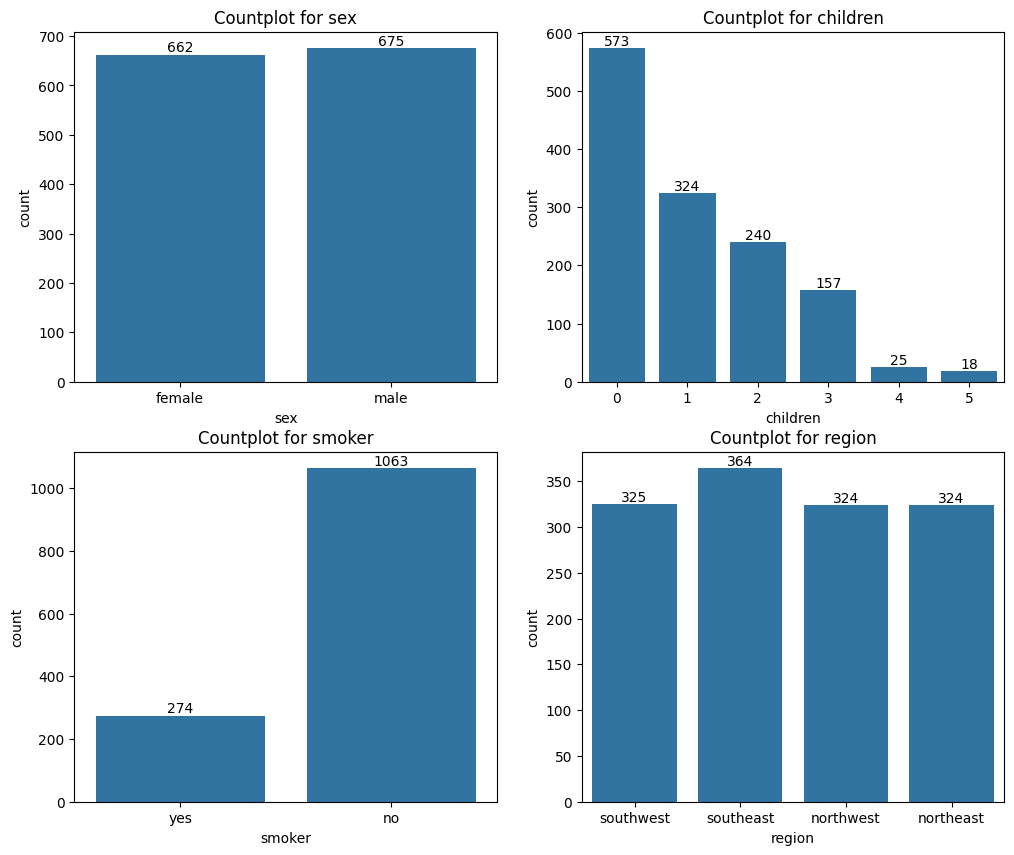

In [19]:
plt.figure(figsize=(12,10))
for i in range(len(cat_cols)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x =df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

#### Univariate - Pie Chart

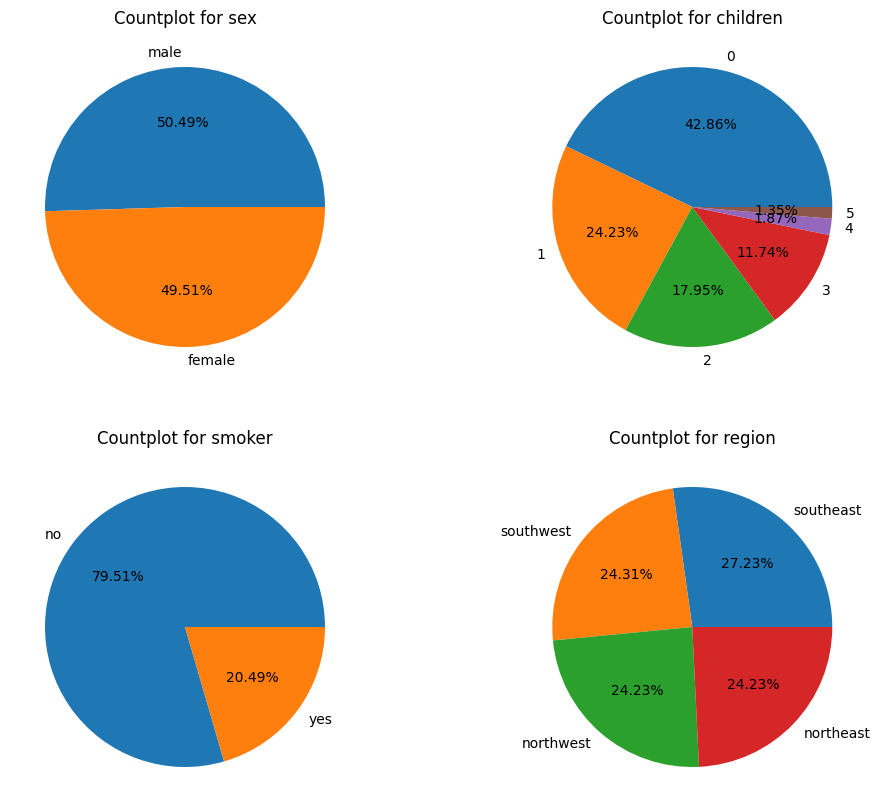

In [20]:
plt.figure(figsize=(12,10))
for i in range(len(cat_cols)):
    plt.subplot(2,2,i+1)
    x = df[cat_cols[i]].value_counts()
    plt.pie(x =x.values,labels=x.index,autopct='%.2f%%')
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

#### Univariate - Num

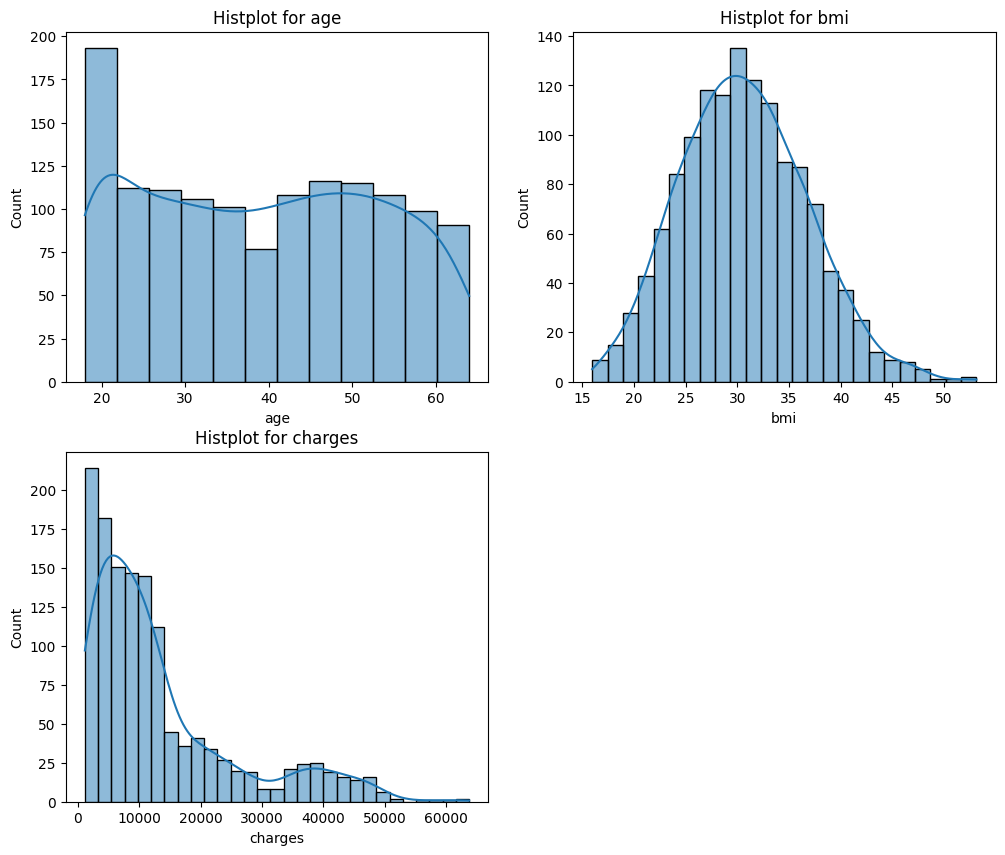

In [21]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.histplot(x =df[num_cols[i]],kde=True)
    plt.title(f'Histplot for {num_cols[i]}')
plt.show()

#### Bi-varaite - Num-Cat

In [22]:
print(num_cols)
print(cat_cols)

['age', 'bmi', 'charges']
['sex', 'children', 'smoker', 'region']


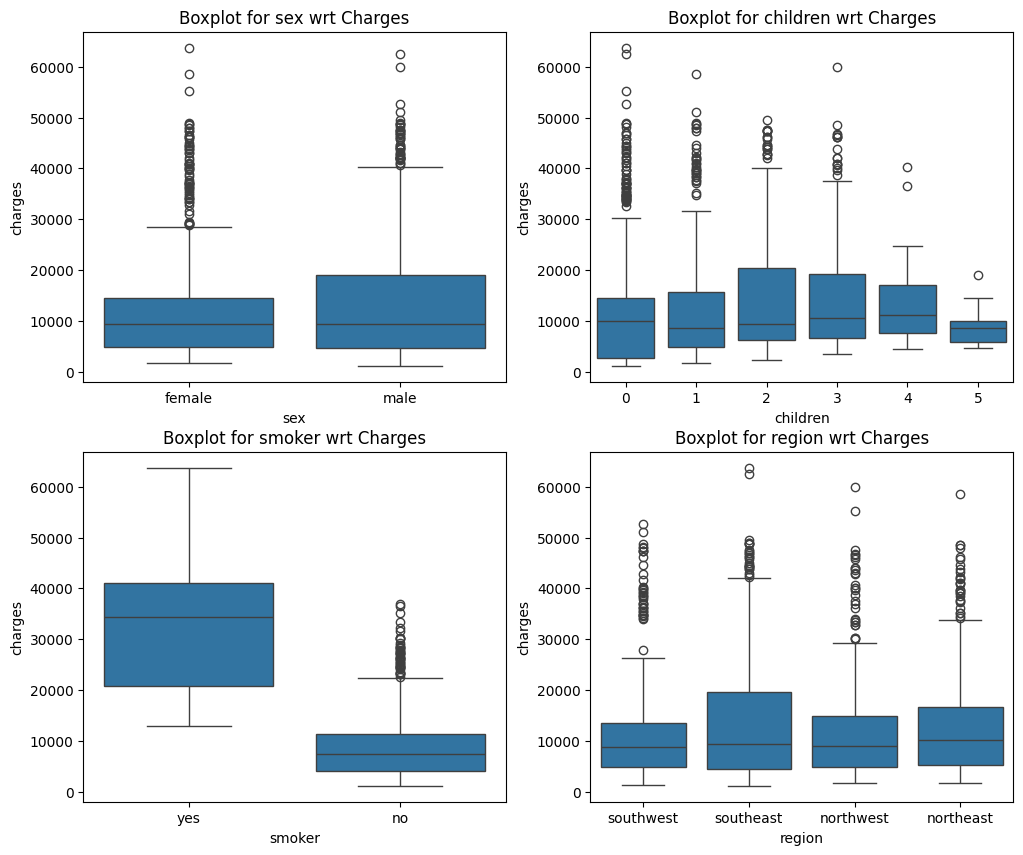

In [25]:
plt.figure(figsize=(12,10))
for i in range(len(cat_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x =df[cat_cols[i]],y=df['charges'])
    plt.title(f'Boxplot for {cat_cols[i]} wrt Charges')
plt.show()

#### Bivaraite - Num - Num

In [26]:
num_cols

['age', 'bmi', 'charges']

<Figure size 1000x1000 with 0 Axes>

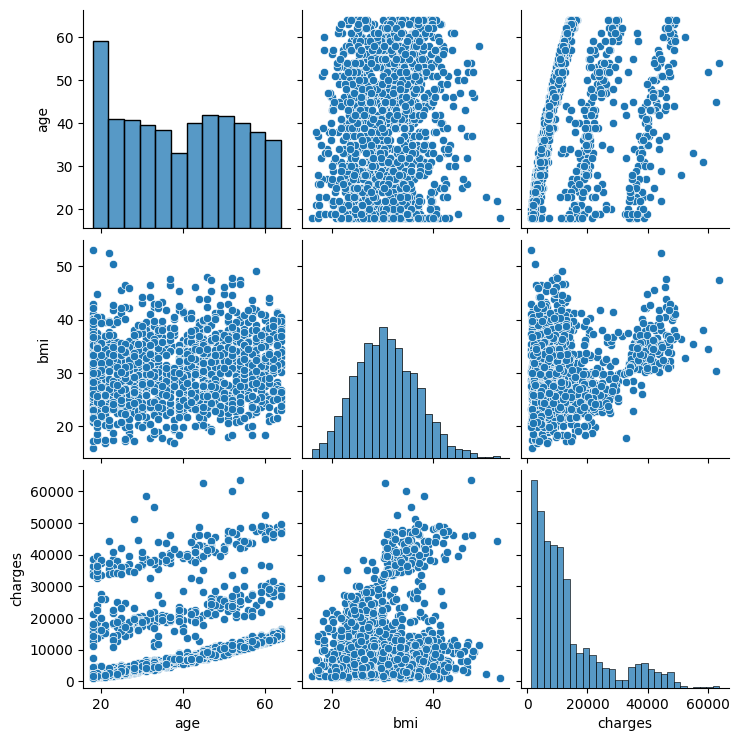

In [27]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df,vars=num_cols)
plt.show()

In [28]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [29]:
x = df[['age','charges']]
x.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


#### WCSS - Within Cluster Sum of Squares


In [30]:
from sklearn.cluster import KMeans

In [49]:
wcss = []

for i in range(1,10):
    m = KMeans(i)
    m.fit(x)
    wcss.append(m.inertia_)
print(wcss)

[195939107986.5376, 47969910641.34925, 22948498745.497368, 12118142140.175962, 8535584662.672014, 6164657141.67405, 4433430135.284164, 3487071860.5511856, 2779428333.857533]


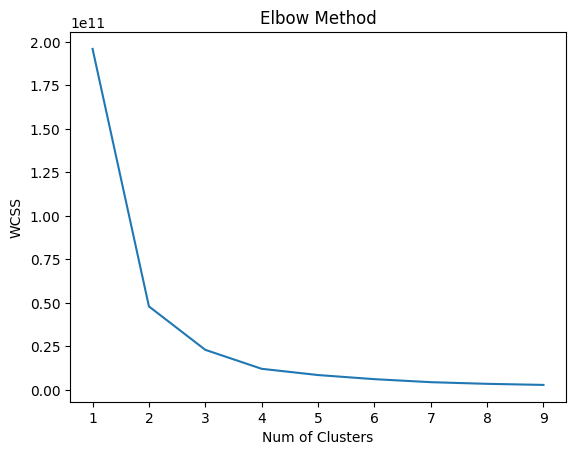

In [32]:
plt.plot(list(range(1,10)),wcss)
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [46]:
k3 = KMeans(3,random_state=42)
k3.fit(x)

KMeans(n_clusters=3, random_state=42)

In [47]:
ypred_k3 = k3.predict(x)
x['Cls3'] =  ypred_k3
x.head()

,age,charges,Cls3
0,19,16884.92400,2
1,18,1725.55230,0
2,28,4449.46200,0
3,33,21984.47061,2
4,32,3866.85520,0


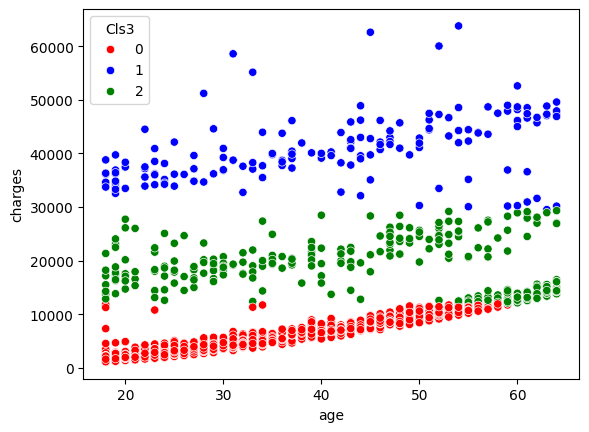

In [48]:
sns.scatterplot(data=x,x='age',y='charges',hue='Cls3',palette=['red','blue','green'])
plt.show()

#### Bi-variate - Num-Num

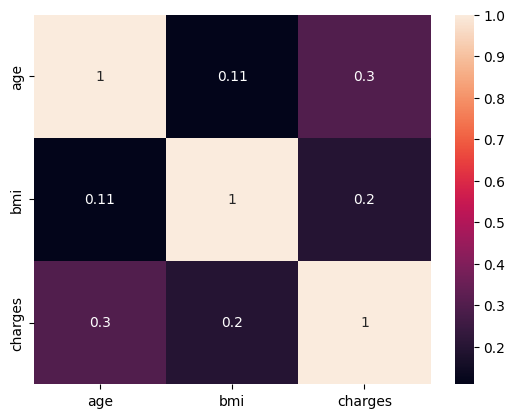

In [50]:
corr = df[num_cols].corr()

sns.heatmap(corr,annot=True)
plt.show()

#### Bi-variate - Cat-Cat

In [51]:
cat_cols

['sex', 'children', 'smoker', 'region']

In [55]:
for i in cat_cols:
    for j in cat_cols:
        if i!=j:
            res = pd.crosstab(df[i],df[j])
            print(res)
            print('*'*50)

children    0    1    2   3   4   5
sex                                
female    289  158  119  77  11   8
male      284  166  121  80  14  10
**************************************************
smoker   no  yes
sex             
female  547  115
male    516  159
**************************************************
region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        160        189        163
**************************************************
sex       female  male
children              
0            289   284
1            158   166
2            119   121
3             77    80
4             11    14
5              8    10
**************************************************
smoker     no  yes
children          
0         458  115
1         263   61
2         185   55
3         118   39
4          22    3
5          17    1
********************************************

#### Outlier Treatment

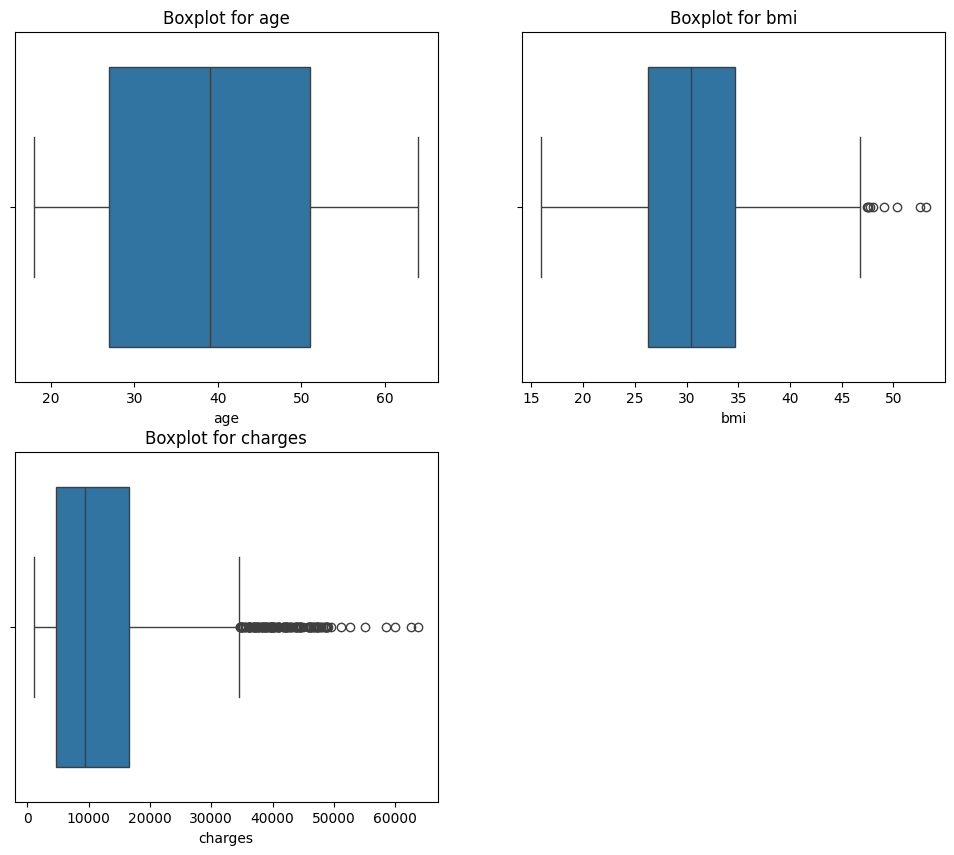

In [56]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x =df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.show()

In [57]:
a1 = df[['bmi','charges']].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,50%,95%,96%,97%,98%,99%,max
bmi,15.9600,30.4000,41.1080,41.800000,42.455200,43.920800,46.411200,53.13000
charges,1121.8739,9386.1613,41210.0498,42920.126232,44495.190584,46677.324238,48537.796878,63770.42801


In [58]:
df1 = df.head()

In [59]:
df['bmi'] = np.where(df['bmi']>46.411200,46.411200,df['bmi'])
df['charges'] = np.where(df['charges']>48537.796878,48537.796878,df['charges'])

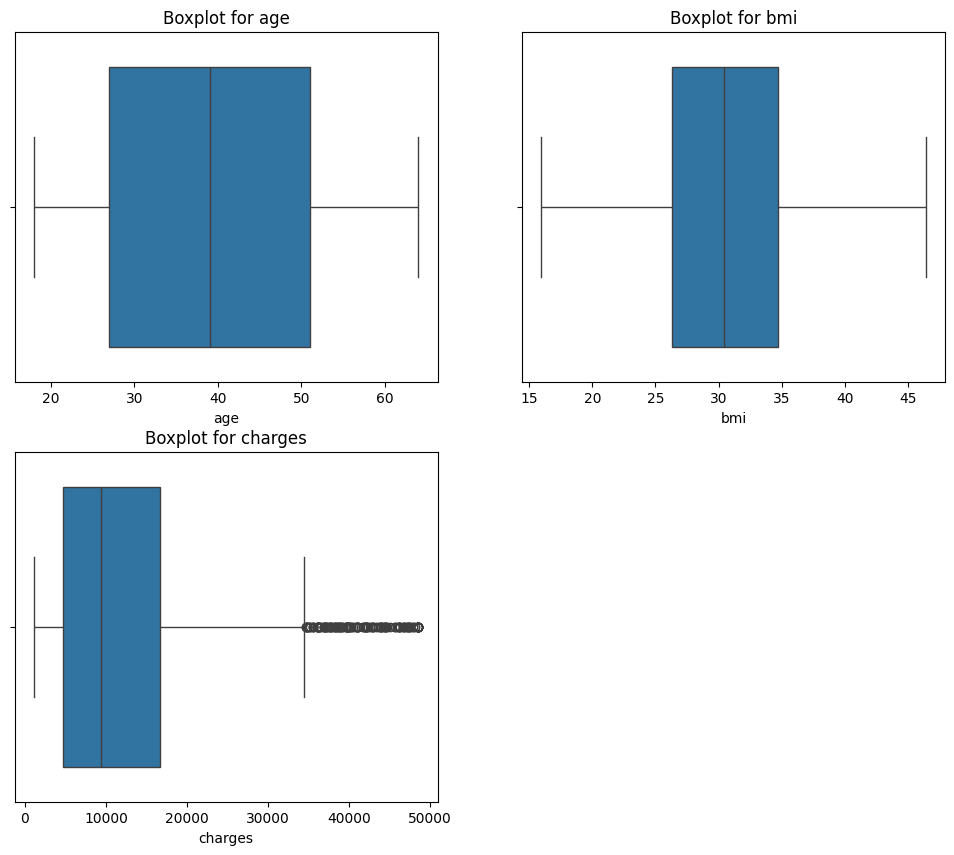

In [60]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x =df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.show()

#### Encoding

In [61]:
cat_cols

['sex', 'children', 'smoker', 'region']

In [114]:
cols_to_encode = ['sex', 'smoker', 'region']
df_dum = pd.get_dummies(data=df,columns=cols_to_encode,drop_first=True,dtype=int)
print(df_dum.shape)
print(df_dum.columns)

(1337, 9)
Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [115]:
from sklearn.metrics import *

In [116]:
def eval_model(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'MAE':mae,
                       'MSE':mse,'RMSE':rmse},index=[mname])
    return res,ypred

#### Select x and y

In [117]:
x = df_dum.drop(['charges'],axis=1)
y = df_dum['charges']
print(x.shape)
print(y.shape)

(1337, 8)
(1337,)


#### Split data into train and test

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=70)

#### Import ML models

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import *

#### 1) LinReg

In [121]:
lr1 = LinearRegression()
lr1_res,ypred_lr1 = eval_model(lr1,'LinReg')
lr1_res

,Train_R2,Test_R2,MAE,MSE,RMSE
LinReg,0.753335,0.76192,4144.691891,3.367875e+07,5803.339865


#### 2) DT Reg

In [122]:
dt1 = DecisionTreeRegressor(max_depth=5,min_samples_split=10)
dt1_res,ypred_dt1 = eval_model(dt1,'DT_Reg')
dt1_res

,Train_R2,Test_R2,MAE,MSE,RMSE
DT_Reg,0.89081,0.832901,2770.275941,2.363775e+07,4861.866441


#### 3) RF_Reg

In [123]:
rf1 = RandomForestRegressor(n_estimators=80,max_depth=5,min_samples_split=10)
rf1_res,ypred_rf1 = eval_model(rf1,'RF_Reg')
rf1_res

,Train_R2,Test_R2,MAE,MSE,RMSE
RF_Reg,0.900626,0.843995,2691.059484,2.206838e+07,4697.699293


#### 4) XGBoost_Reg

In [124]:
xgb1 = XGBRegressor(reg_lamba=0.4,reg_alpha=0.5,gamm=0.1,eta=0.1)
xgb1_res,ypred_xgb1 = eval_model(xgb1,'XGB_Reg')
xgb1_res

,Train_R2,Test_R2,MAE,MSE,RMSE
XGB_Reg,0.976369,0.823599,2840.277172,2.495363e+07,4995.360818


#### Best Model - RF

In [125]:
import pickle

In [126]:
pickle.dump(lr1,open('lr1_jul21.pkl','wb'))
pickle.dump(dt1,open('dt1_jul21.pkl','wb'))
pickle.dump(rf1,open('rf1_jul21.pkl','wb'))

In [127]:
df_dum.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [128]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [98]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.643427,1.095737,13229.380904
std,14.044333,6.041403,1.205571,11941.576481
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,46.411200,5.000000,48537.796878
